<a href="https://colab.research.google.com/github/prakhar9998/image-denoising/blob/main/image_denoise_output.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!ls gdrive/MyDrive/denoise/

dncnn_model  foreman_noisy_s15.png  lena_noisy_s12.png	noisy1.png


In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def psnr(im1, im2):
    return tf.image.psnr(im1, im2, max_val=1.0)

model = tf.keras.models.load_model('gdrive/MyDrive/denoise/dncnn_model', compile=False, custom_objects={'psnr': psnr})

In [21]:
def dcnn_loss(predicted, true):
    return tf.keras.backend.sum(tf.keras.backend.square(predicted - true)) / 2

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=dcnn_loss, metrics=[psnr])

In [221]:
!ls gdrive/MyDrive/denoise/

dncnn_model	       Highimgnoise.jpg		  noisy1.png
flower_0.10_noisy.jpg  lena_noisy_s12.png	  noisy.bmp
foreman_noisy_s15.png  Noise_salt_and_pepper.png  SuperNoise_02.jpg


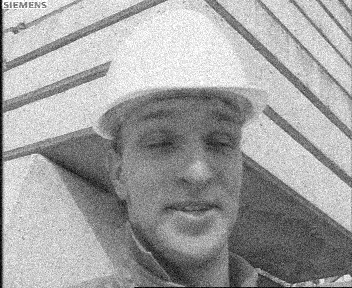

In [241]:
img = tf.keras.preprocessing.image.load_img('gdrive/MyDrive/denoise/foreman_noisy_s15.png')
img

In [242]:
img = tf.keras.preprocessing.image.img_to_array(img) / 255
img.shape

(288, 352, 3)

In [243]:
patches = tf.image.extract_patches(images=np.expand_dims(img, 0),
                         sizes=[1,140,140,1],
                         strides=[1,140,140,1],
                         rates=[1,1,1,1],
                         padding='SAME')

In [244]:
patches = tf.reshape(patches, [-1, 140, 140, 3])
patches.shape

TensorShape([9, 140, 140, 3])

In [245]:
import math

def display_patches(patches, image_width, image_height):
    horizontal_patches = math.ceil(image_width / 140)
    vertical_patches = math.ceil(image_height / 140)

    print(horizontal_patches, vertical_patches)

    fig = plt.figure(figsize=(8,8)) # Notice the equal aspect ratio

    ax = [fig.add_subplot(horizontal_patches,vertical_patches,i+1) for i in range(horizontal_patches * vertical_patches)]

    for a in ax:
        a.set_xticklabels([])
        a.set_yticklabels([])
        a.axis('off')
        a.set_aspect('equal')

    fig.subplots_adjust(wspace=0, hspace=0)

    for i in range(1, horizontal_patches * vertical_patches + 1):
        patch_img = patches[i-1]
        fig.add_subplot(horizontal_patches, vertical_patches, i)
        plt.imshow(np.array((patch_img)).clip(0, 1))

    plt.show()

3 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


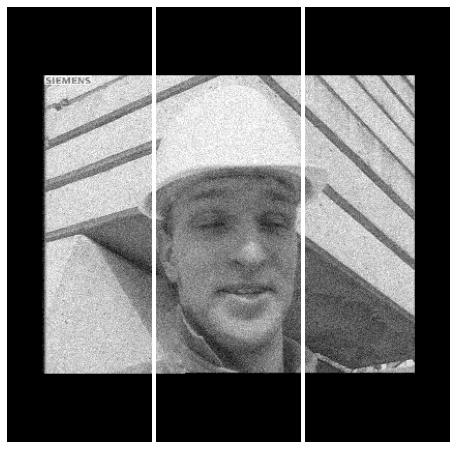

In [246]:
display_patches(patches, img.shape[0], img.shape[1])

In [247]:
res_images = []
for i in range(len(patches)):
    res_images.append(model.predict(np.expand_dims(patches[i], 0)))

In [251]:
res_patches = np.array(res_images)
res_patches = tf.reshape(res_patches, [-1, 140, 140, 3])
res_patches.shape

TensorShape([9, 140, 140, 3])

3 3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


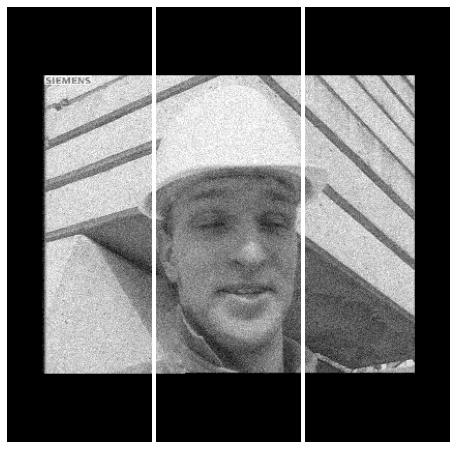

3 3


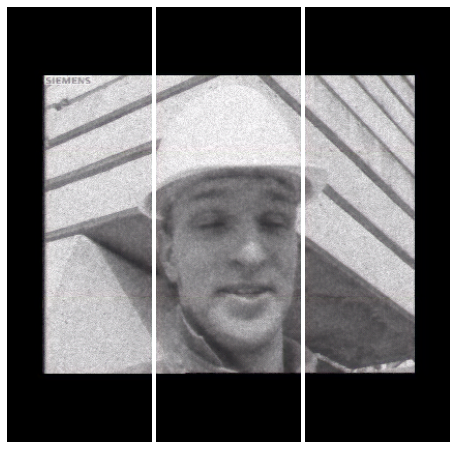

In [252]:
display_patches(patches, img.shape[0], img.shape[1])
display_patches(res_patches, img.shape[0], img.shape[1])

In [253]:
res_patches.shape

TensorShape([9, 140, 140, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


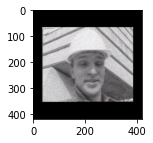

In [315]:
test = tf.split(res_patches, res_patches.shape[0])

horizontal_patches = math.ceil(img.shape[0] / 140)
vertical_patches = math.ceil(img.shape[1] / 140)

combined = []

for i in range(vertical_patches):
    combined.append(tf.concat([test[i * vertical_patches + j][0] for j in range(horizontal_patches)], 1))

final = tf.concat(combined, 0)

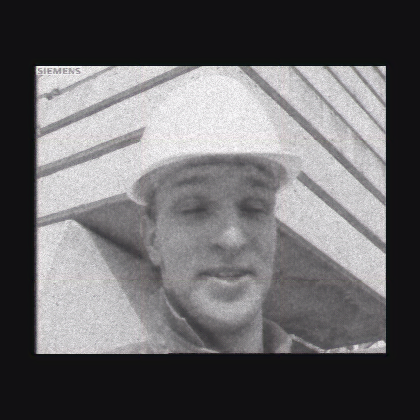

In [322]:
output_image = tf.keras.preprocessing.image.array_to_img(final)
output_image